In [1]:
pip install tensorflow==1.15.0

      Successfully uninstalled tensorflow-2.4.0


In [2]:
## Import liberary

import numpy as np
import pandas as pd
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import kernel_approximation
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile 

In [3]:
## Import Data and plot count data

Creditcard=pd.read_csv('/content/drive/MyDrive/creditcard.csv');

In [4]:
## Seperate data and class 

X=Creditcard.drop(columns='Class',axis=1)
Y=Creditcard.Class.values
Y=2*Y-1;

In [5]:
scaler = StandardScaler()
scaler.fit(X);
X=scaler.transform(X)

In [6]:
## Train and Test split

np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y);

In [9]:
## tensfor flow setting 
sess = tf.Session()

In [ ]:
## Create the placeholder and Variable  .
x_data = tf.placeholder(shape=[None, 30], dtype=tf.float32) 
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[30,1])) 
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [ ]:
##Declare the model output.
model_output = tf.subtract(tf.matmul(x_data, A), b)

In [ ]:
##Declare the necessary components for the maximum margin loss.
l2_norm = tf.reduce_sum(tf.square(A)) 
alpha = tf.constant([0.000001])
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1.,tf.multiply(model_output, y_target))))
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [ ]:
##Declare the prediction and accuracy functions.
prediction = tf.sign(model_output) 
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [ ]:
##Declare the optimizer.
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss) 
init = tf.initialize_all_variables() 
sess.run(init);
op=100;

In [ ]:
loss_vec = []
train_accuracy = []
test_accuracy = []
TPRFPRT=[]
TPRFPRTe=[]
for i in range(5000): 
  rand_index = np.random.choice(len(X_train), size=2500)
  X1 = X_train[rand_index] 
  Y1 = np.transpose([Y_train[rand_index]]) 
  sess.run(train_step, feed_dict={x_data: X1, y_target: Y1})
  temp_loss = sess.run(loss, feed_dict={x_data: X1, y_target: Y1}) 
  loss_vec.append(temp_loss)
  train_acc_temp = sess.run(accuracy, feed_dict={x_data: X_train, y_target: np.transpose([Y_train])})    
  train_accuracy.append(train_acc_temp)    
  test_acc_temp = sess.run(accuracy, feed_dict={x_data: X_test, y_target: np.transpose([Y_test])})     
  test_accuracy.append(test_acc_temp)
  if i%100==0:
    pre=sess.run(prediction,feed_dict={x_data: X_train})
    U=confusion_matrix(pre,Y_train)
    TPRFPRT.append((U[1,1]/U[1,0])*((U[0,0]+U[1,0])/(U[0,1]+U[1,1])));
    pre=sess.run(prediction,feed_dict={x_data: X_test})
    U=confusion_matrix(pre,Y_test)
    TPRFPRTe.append((U[1,1]/U[1,0])*((U[0,0]+U[1,0])/(U[0,1]+U[1,1])));

In [ ]:
f=plt.figure(figsize=(15,8))
plt.plot(np.arange(1,5001),train_accuracy,label='train')
plt.plot(np.arange(1,5001),test_accuracy,label='test')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('accuracy',fontsize=20)
plt.legend(fontsize=20);
plt.title('Accuracy vesus epoch for hard linear svm',fontsize=20);

In [ ]:
f=plt.figure(figsize=(15,8))
plt.plot(np.arange(100,5001,step=100),TPRFPRT,label='train')
plt.plot(np.arange(100,5001,step=100),TPRFPRTe,label='test')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('true positive rate/false positive rate',fontsize=20)
plt.legend(fontsize=20);
plt.title('true positive rate/false positive rate vesus epoch for hard linear svm',fontsize=20);

In [ ]:
## soft linear svm
sess_linear_soft = tf.Session()
## Create the placeholder and Variable  .
x_data = tf.placeholder(shape=[None, 30], dtype=tf.float32) 
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[30,1])) 
b = tf.Variable(tf.random_normal(shape=[1,1]))
##Declare the model output.
model_output = tf.subtract(tf.matmul(x_data, A), b)
l2_norm = tf.reduce_sum(tf.square(A)) 
alpha = tf.constant([100.0])
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1.,tf.multiply(model_output, y_target))))
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))
##Declare the prediction and accuracy functions.
prediction = tf.sign(model_output) 
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))
##Declare the optimizer.
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss) 
init = tf.global_variables_initializer()
sess_linear_soft.run(init)

In [ ]:
loss_vec = []
train_accuracy = []
test_accuracy = []
TPRFPRT=[]
TPRFPRTe=[]
for i in range(5000): 
  rand_index = np.random.choice(len(X_train), size=2500)
  X1 = X_train[rand_index] 
  Y1 = np.transpose([Y_train[rand_index]]) 
  sess_linear_soft.run(train_step, feed_dict={x_data: X1, y_target: Y1})
  temp_loss = sess_linear_soft.run(loss, feed_dict={x_data: X1, y_target: Y1}) 
  loss_vec.append(temp_loss)
  train_acc_temp = sess_linear_soft.run(accuracy, feed_dict={x_data: X_train, y_target: np.transpose([Y_train])})    
  train_accuracy.append(train_acc_temp)    
  test_acc_temp = sess_linear_soft.run(accuracy, feed_dict={x_data: X_test, y_target: np.transpose([Y_test])})     
  test_accuracy.append(test_acc_temp)
  if i%100==0:
    pre=sess_linear_soft.run(prediction,feed_dict={x_data: X_train})
    U=confusion_matrix(pre,Y_train)
    TPRFPRT.append((U[1,1]/(U[1,0]+0.001))*((U[0,0]+U[1,0])/(U[0,1]+U[1,1])));
    pre=sess_linear_soft.run(prediction,feed_dict={x_data: X_test})
    U=confusion_matrix(pre,Y_test)
    TPRFPRTe.append((U[1,1]/(U[1,0]+0.001))*((U[0,0]+U[1,0])/(U[0,1]+U[1,1])));

In [ ]:
f=plt.figure(figsize=(15,8))
plt.plot(np.arange(1,5001),train_accuracy,label='train')
plt.plot(np.arange(1,5001),test_accuracy,label='test')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('accuracy',fontsize=20)
plt.legend(fontsize=20);
plt.title('Accuracy vesus epoch for soft linear svm',fontsize=20);

In [ ]:
f=plt.figure(figsize=(15,8))
plt.plot(np.arange(100,5001,step=100),TPRFPRT,label='train')
plt.plot(np.arange(100,5001,step=100),TPRFPRTe,label='test')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('true positive rate/false positive rate',fontsize=20)
plt.legend(fontsize=20);
plt.title('true positive rate/false positive rate vesus epoch for soft linear svm',fontsize=20);

In [22]:
## Gussian soft
gussian=tf.Session();
batch_size=4920
x_input = tf.placeholder(shape=[None, 30], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
pred_input = tf.placeholder(shape=[None, 30], dtype=tf.float32)
b = tf.Variable(tf.random_normal(shape=[1,batch_size])*0.05)
gamma = tf.constant(-50.0)
C = tf.constant([0.0000001])
dist = tf.reduce_sum(tf.square(x_input), 1)
dist = tf.reshape(dist, [-1,1])
sq_dists = tf.add(tf.subtract(dist, tf.multiply(2., tf.matmul(x_input, tf.transpose(x_input)))), tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))
first_term = tf.multiply(C, tf.reduce_sum(b))
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vec_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_term, second_term))
rA = tf.reshape(tf.reduce_sum(tf.square(x_input), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(pred_input), 1),[-1,1])
pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_input, tf.transpose(pred_input)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))
prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target),b), pred_kernel)
prediction = tf.sign(prediction_output-tf.reduce_mean(prediction_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))
my_opt = tf.train.GradientDescentOptimizer(0.002)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
gussian.run(init)
loss_vec= []
TPRFPRT=[]
TPRFPRTe=[]
TPRT=[];
FPRT=[];
TPRTe=[];
FPRTe=[];
for i in range(300): 
  rand_index = np.random.choice(len(X_train), size=4920)
  X1 = X_train[rand_index] 
  Y1 = np.transpose([Y_train[rand_index]]) 
  Y1=Y1.reshape(-1,1)
  gussian.run(train_step, feed_dict={x_input: X1, y_target: Y1})
  temp_loss = gussian.run(loss, feed_dict={x_input: X1, y_target: Y1}) 
  loss_vec.append(temp_loss)
  if i%10==0:
    pre=gussian.run(prediction, feed_dict={x_input: X1, y_target: Y1, pred_input: X_train})
    for j in range(pre.shape[1]):
          if pre[0,j] > 0:
            pre[0,j] = 1
          else:
            pre[0,j] = 0
    ty=(Y_train+1)/2;       
    pre=pre.astype(np.int32)        
    U=confusion_matrix(pre.reshape(-1,),ty.astype(np.int32))
    TPRFPRT.append((U[1,1]/(U[1,0]))*((U[0,0]+U[1,0])/(U[0,1]+U[1,1])));
    TPRT.append(U[1,1]/(U[0,1]+U[1,1]))
    FPRT.append(U[1,0]/(U[0,0]+U[1,0]))
    pre=gussian.run(prediction, feed_dict={x_input: X1, y_target: Y1, pred_input: X_test})
    pre=pre.astype(np.int32)
    U=confusion_matrix(pre.reshape(-1,),Y_test)
    TPRTe.append(U[1,1]/(U[0,1]+U[1,1]))
    FPRTe.append(U[1,0]/(U[0,0]+U[1,0]))
    TPRFPRTe.append((U[1,1]/(U[1,0]))*((U[0,0]+U[1,0])/(U[0,1]+U[1,1]))); 
    
  

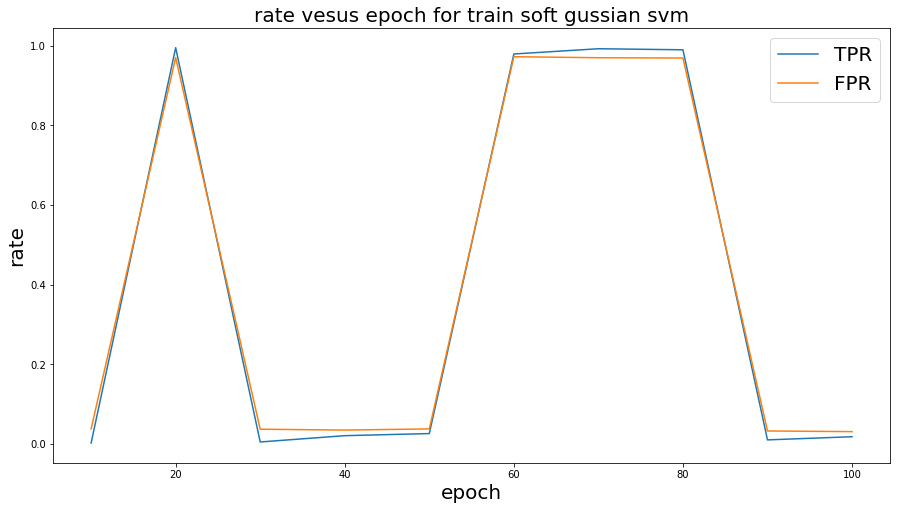

In [16]:
f=plt.figure(figsize=(15,8))
plt.plot(np.arange(10,101,step=10),TPRT,label='TPR')
plt.plot(np.arange(10,101,step=10),FPRT,label='FPR')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('rate',fontsize=20)
plt.legend(fontsize=20);
plt.title('rate vesus epoch for train soft gussian svm',fontsize=20);

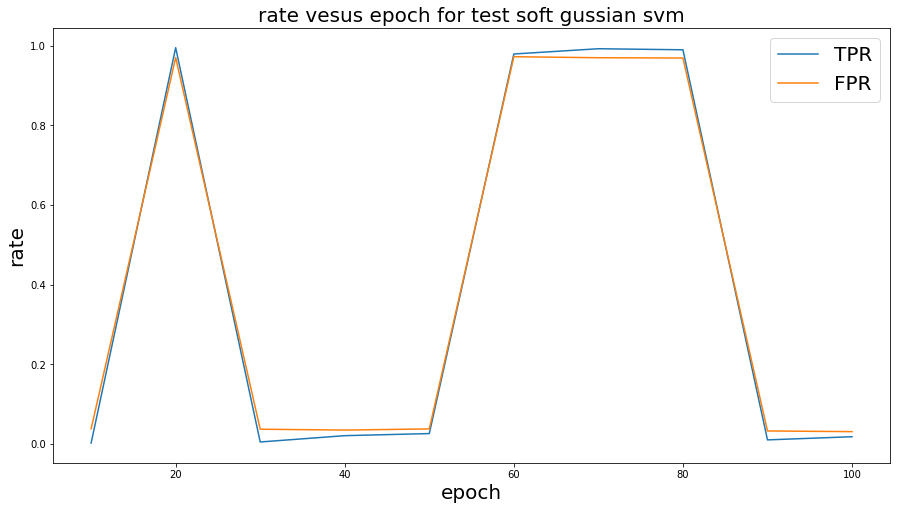

In [17]:
f=plt.figure(figsize=(15,8))
plt.plot(np.arange(10,101,step=10),TPRT,label='TPR')
plt.plot(np.arange(10,101,step=10),FPRT,label='FPR')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('rate',fontsize=20)
plt.legend(fontsize=20);
plt.title('rate vesus epoch for test soft gussian svm',fontsize=20);

In [18]:
## Gussian hard
gussian=tf.Session();
batch_size=4920
x_input = tf.placeholder(shape=[None, 30], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
pred_input = tf.placeholder(shape=[None, 30], dtype=tf.float32)
b = tf.Variable(tf.random_normal(shape=[1,batch_size])*0.05)
gamma = tf.constant(-50.0)
C = tf.constant([10000.0])
dist = tf.reduce_sum(tf.square(x_input), 1)
dist = tf.reshape(dist, [-1,1])
sq_dists = tf.add(tf.subtract(dist, tf.multiply(2., tf.matmul(x_input, tf.transpose(x_input)))), tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))
first_term = tf.multiply(C, tf.reduce_sum(b))
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vec_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_term, second_term))
rA = tf.reshape(tf.reduce_sum(tf.square(x_input), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(pred_input), 1),[-1,1])
pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_input, tf.transpose(pred_input)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))
prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target),b), pred_kernel)
prediction = tf.sign(prediction_output-tf.reduce_mean(prediction_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))
my_opt = tf.train.GradientDescentOptimizer(0.002)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
gussian.run(init)
loss_vec= []
TPRFPRT=[]
TPRFPRTe=[]
TPRT=[];
FPRT=[];
TPRTe=[];
FPRTe=[];
for i in range(100): 
  rand_index = np.random.choice(len(X_train), size=4920)
  X1 = X_train[rand_index] 
  Y1 = np.transpose([Y_train[rand_index]]) 
  Y1=Y1.reshape(-1,1)
  gussian.run(train_step, feed_dict={x_input: X1, y_target: Y1})
  temp_loss = gussian.run(loss, feed_dict={x_input: X1, y_target: Y1}) 
  loss_vec.append(temp_loss)
  if i%10==0:
    pre=gussian.run(prediction, feed_dict={x_input: X1, y_target: Y1, pred_input: X_train})
    for j in range(pre.shape[1]):
          if pre[0,j] > 0:
            pre[0,j] = 1
          else:
            pre[0,j] = 0
    ty=(Y_train+1)/2;       
    pre=pre.astype(np.int32)        
    U=confusion_matrix(pre.reshape(-1,),ty.astype(np.int32))
    TPRFPRT.append((U[1,1]/(U[1,0]))*((U[0,0]+U[1,0])/(U[0,1]+U[1,1])));
    TPRT.append(U[1,1]/(U[0,1]+U[1,1]))
    FPRT.append(U[1,0]/(U[0,0]+U[1,0]))
    pre=gussian.run(prediction, feed_dict={x_input: X1, y_target: Y1, pred_input: X_test})
    pre=pre.astype(np.int32)
    U=confusion_matrix(pre.reshape(-1,),Y_test)
    TPRTe.append(U[1,1]/(U[0,1]+U[1,1]))
    FPRTe.append(U[1,0]/(U[0,0]+U[1,0]))
    TPRFPRTe.append((U[1,1]/(U[1,0]))*((U[0,0]+U[1,0])/(U[0,1]+U[1,1]))); 
    
  

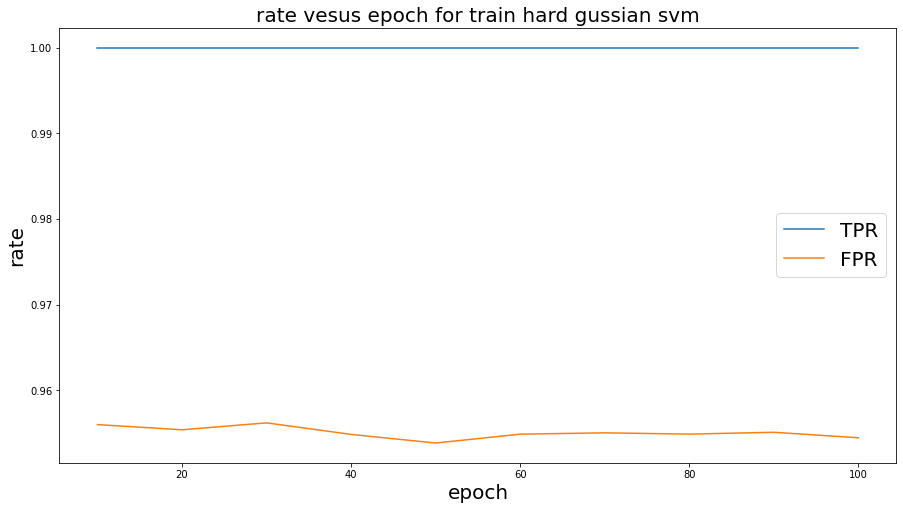

In [19]:
f=plt.figure(figsize=(15,8))
plt.plot(np.arange(10,101,step=10),TPRT,label='TPR')
plt.plot(np.arange(10,101,step=10),FPRT,label='FPR')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('rate',fontsize=20)
plt.legend(fontsize=20);
plt.title('rate vesus epoch for train hard gussian svm',fontsize=20);

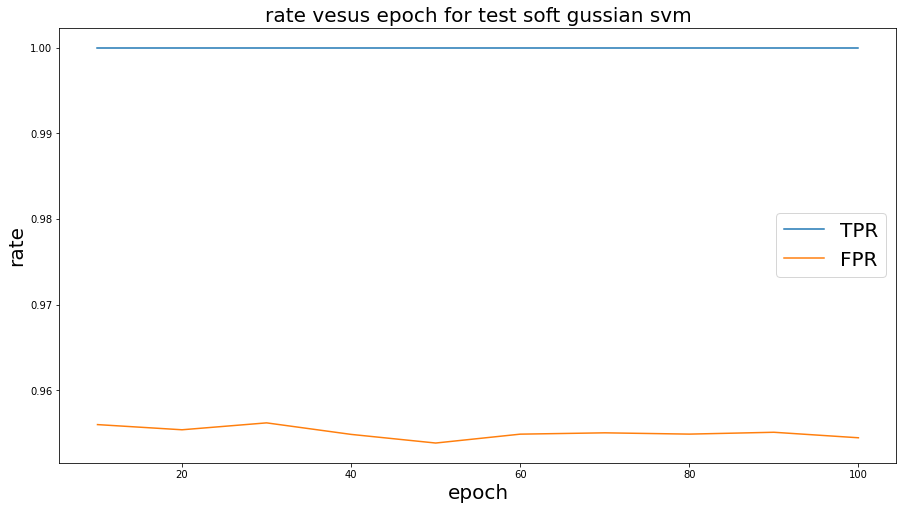

In [20]:
f=plt.figure(figsize=(15,8))
plt.plot(np.arange(10,101,step=10),TPRT,label='TPR')
plt.plot(np.arange(10,101,step=10),FPRT,label='FPR')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('rate',fontsize=20)
plt.legend(fontsize=20);
plt.title('rate vesus epoch for test soft gussian svm',fontsize=20);

In [64]:
def poly(x,y):
  K=np.zeros((len(x)+1,len(x)+1))
  for i in range(len(x)):
    for j in range(len(x)):
      K[i,j]=y[i]*y[j]*math.pow((np.dot(x[i,:],x[j,:].transpose())),3)
  for i in range(len(x)):
    K[i,len(x)]=y[i]
    K[len(x),i]=y[i]
  return K



In [57]:
X=np.array([[1,2],[2,1]])
Y=np.array([1,2])
poly(X,Y)

array([[1., 2., 1.],
       [2., 4., 2.],
       [1., 2., 0.]])

In [65]:
batch_size=200
q=np.ones((batch_size+1,1))
q[batch_size,0]=q[batch_size,0]-1
q=q.astype(np.float64)

In [67]:
## poly degree 3 
poly1=tf.Session();
A = tf.Variable(tf.random_normal(shape=[batch_size+1,1],dtype=tf.float64)*100000)
init = tf.global_variables_initializer()
poly1.run(init)
for i in range(100):
  rand_index = np.random.choice(len(X_train), size=batch_size)
  X1 = X_train[rand_index] 
  Y1 = np.transpose([Y_train[rand_index]]) 
  second_term=tf.matmul(tf.transpose(q),A)
  first_term=tf.matmul(tf.matmul(tf.transpose(A),poly(X1,Y1)/2),A)
  loss=tf.subtract(first_term,second_term)
  my_opt = tf.train.GradientDescentOptimizer(0.001)
  train_step = my_opt.minimize(loss)
  poly1.run(train_step)
  losss=poly1.run(loss)
  print(losss)




[[4.94000779e+25]]
[[3.38873221e+37]]
[[2.09485577e+38]]
[[1.87771154e+41]]
[[4.03341416e+44]]
[[9.55496427e+57]]
[[2.33069353e+54]]
[[7.09121258e+68]]
[[3.34096347e+68]]
[[1.06020481e+77]]
[[9.81006849e+77]]
[[8.69675846e+85]]
[[5.00179663e+94]]
[[2.11595069e+92]]
[[6.89815275e+103]]
[[1.32415281e+105]]
[[2.98598016e+111]]
[[3.6864939e+118]]
[[1.92642947e+123]]
[[2.37044172e+125]]
[[2.50354612e+132]]
[[4.88543813e+133]]
[[7.62394756e+138]]
[[1.90183691e+145]]
[[2.83990469e+149]]
[[1.92036646e+156]]
[[1.1263527e+158]]
[[7.53451691e+164]]
[[1.61234144e+170]]
[[1.68615338e+178]]
[[3.30415493e+176]]
[[4.9200896e+183]]
[[3.05690621e+186]]
[[1.45267096e+194]]
[[5.39187533e+197]]
[[5.16229891e+209]]
[[7.93345244e+211]]
[[1.96302542e+213]]
[[1.66018618e+224]]
[[4.62264292e+227]]
[[2.09024183e+240]]
[[3.99394424e+240]]
[[3.94114891e+244]]
[[1.00680137e+246]]
[[3.38553182e+254]]
[[1.02305045e+253]]
[[2.98319844e+262]]
[[3.97075205e+269]]
[[5.84785377e+268]]
[[9.87942833e+281]]
[[3.71132631e+286

In [28]:
tf.matmul(tf.matmul(tf.transpose(A),poly(X1,Y1)),A)

<tf.Tensor 'MatMul_12:0' shape=(1, 1) dtype=float64>

In [13]:
Y1.shape

(200, 1)

In [24]:
np.sign(pre).astype(np.int32)
pre+0.

array([-1, -1, -1, ..., -1, -1, -1])